# Fizyka polaronów w kwantowych układach wielu cząstek
**Warsztaty Cyfrowa NanoNauka**   
link: [cnn.fizyka.umk.pl](http://cnn.fizyka.umk.pl/)  
data: 04.03.2023

dr Tomasz Wasak  
Uniwersytet Mikołaja Kopernika w Toruniu  
Wydział Fizyki, Astronomii i Informatyki Stosowanej  
ul. Grudziądzka 5  
87-100 Toruń  
email: twasak@umk.pl

# O zmiennych losowych

Komputery nie tylko pozwoliły na dokładne obliczenia i symulacje trudnych numerycznie zagadnień, lecz dały dostęp do analizy zjawisk, które rządzą się rachunkiem prawdopodobieństwa. U podstaw mechaniki kwantowej leżą zjawiska, które oparte są o zjawiska losowe.

Sprawdźmy najpierw jednak, jak można na komputerze generować i opisywać zjawiska losowe.

## Zmienna binarna

Wyobraźmi sobie losowy ciąg liczb 0 i 1.
Mógłby wyglądać tak:

In [ ]:
# Importujemy maszynkę do generowania liczb losowych w Pythonie, tj. moduł numpy
# jest też moduł scipy, ale dla prostoty wykorzystamy tutaj numpy
import numpy as np

# Obiekt, który generuje liczby losowe ma bardzo 'przyjazną' nazwę "random.default_rng".
# Ustawiamy tzw. "seed", który jest daną wejściową, na podstawie której generowane są liczby.
# Naszą maszynkę nazwiemy "generator", ale nazwa mogłąby być dowolna.
seed = 12345
generator = np.random.default_rng(seed)

# ustawiamy seed tylko dlatego, żebyście zobaczyli, to co ja. Możecie ustawić dowolnie inny.

Wylosujmy teraz kilka (tutaj 100) liczb.

In [24]:
# Ustalmy najpierw ile chcemy wygenerować liczb
rozmiar_probki = 100

# Losowanie liczb wykorzstuje funkcję "integers" naszej maszynki "generator"
# Losujemy z przedziału [low,high) tj. dolny przedział ("low") się zawiera, górny wyłączony
# Dlatego ustawiamy low=0, a high=2, bo high się nie losuje, a więc, przedział [0,2) = 0,1 bez 2.
probka = generator.integers(low=0, high=2, size=rozmiar_probki) 

Zobaczmy jak wygląda nasza próbka.

In [25]:
probka

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

Narysujmy to, żeby zobaczyć jak wygląda.

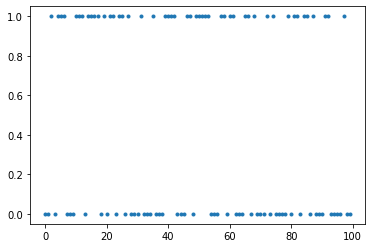

In [26]:
# Potrzebujemy modułu do rysowania 
import matplotlib.pyplot as plt

plt.plot(probka, ".")
plt.show()

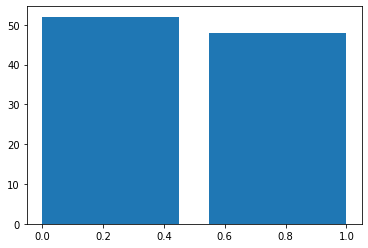

In [27]:
plt.hist(probka, bins=[0,0.45,0.55,1])
plt.show()

Przydatna charakterystyka danych w Pythonie. Jaki jest rozmiar danych (`size`) w poszczególnych wymiarach (`shape`)?

In [28]:
# kształt danych, 
print("Kształt = ", probka.shape)

# rozmiar danych
print("Rozmiar = ", probka.size)

# ile zajmuje to w bajtach?
print("Bajtów: ", probka.nbytes)
print("Bajtów:", probka.size * probka.itemsize)

Kształt =  (100,)
Rozmiar =  100
Bajtów:  800
Bajtów: 800


## Charakterystyka losowych wielkości

Strategia postępowania z ekperymentami (na przykład takimi na komputerach), w których pojawią się liczby losowe jest następująca. Powtarzamy dany eksperyment wiele razy, a z otrzymanych danych staramy się uzyskać jakieś wielkości, które mają sens i pozwolą nam scharakteryzować te dane.

Wprowadźmy teraz ważne wielkości, które ułatwiają analizę danych.

**Średnia**:
$$\langle x \rangle = \frac{1}{N}\sum_i x_i$$ 

**Kwadrat średniej**:
$$\langle x^2 \rangle = \frac{1}{N}\sum_i x_i^2$$

**Wariancja**:
$$\mathrm{Var}(x) = \left\langle \big(x-\langle x \rangle\big)^2 \right\rangle = \langle x^2\rangle - \langle x \rangle^2$$

**Odchylenie standardowe**:
$$\sigma_x = \left\langle \big(x-\langle x \rangle\big)^2 \right\rangle\!{}^{1/2}  =  \sqrt{\mathrm{Var}(x)}$$

Zobaczmy jak to działa na przykładzie liczb 0 i 1.

In [30]:
# losujemy próbkę
rozmiar_probki = 1000
probka = generator.integers(low=0, high=2, size=rozmiar_probki) 

probka[1:40]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [35]:
# policzmy średnią i wariancję
srednia = np.mean(probka)
wariancja = np.std(probka)**2

srednia, wariancja

(0.523, 0.24947100000000003)

In [36]:
# policzy z definicji wariancję < ( x - <x> )**2 >
np.sum(((probka - np.mean(probka))**2))/probka.size, 0.5**2 # teoretyczna wartość to 0.25

(0.249471, 0.25)

In [37]:
odch_std = np.std(probka)
print("Odchylenie standardowe %f." % odch_std)

# odchylenie standardowe mowi o rozrzucie danych wokol wartości średniej
print(f"Przedział: [{srednia - odch_std}, {srednia + odch_std}]")

Odchylenie standardowe 0.499471.
Przedział: [0.023529280137463915, 1.022470719862536]


## Dlaczego prawie wszędzie w naturze są rozkłady Gaussowskie? Centralne twierdzenie graniczne

Zobaczmy co się stanie, jeżeli wylosujemy $N$ liczb losowych 0 lub 1 i je dodamy.
$$X = x_1 + x_2 + \ldots + x_N  = \sum_{i=1}^N x_i $$

In [46]:
# ustalmy ile chcemy liczb losowych
N = 20

# generujemy ciąg N liczb losowych 0 lub 1
seq = generator.integers(low=0,high=2, size=N)
print("Wylosowaliśmy: ", seq)
print("suma = ", np.sum(seq))

Wylosowaliśmy:  [0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0]
suma =  11


Powtórzmy to wiele, wiele razy...

In [53]:
N_powtorzen = 10**5

dane = np.empty(shape=N_powtorzen)

# powtarzamy losowanie przy pomocy instrukcji for
for i in range(1, N_powtorzen):
  seq = generator.integers(low=0,high=2, size=N)
  dane[i] = np.sum(seq)

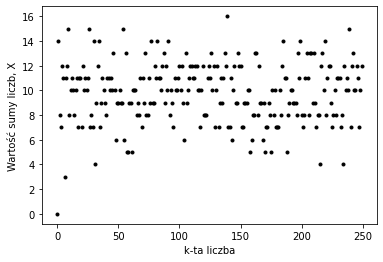

In [55]:
# zobaczmy jak wygląda pierwsze 250 danych
plt.plot(dane[:250], ".k") # ".k" oznacza "narysuj kropki (.) w kolorze czarnym (k)"
plt.xlabel("k-ta liczba")
plt.ylabel("Wartość sumy liczb, X")
plt.show()

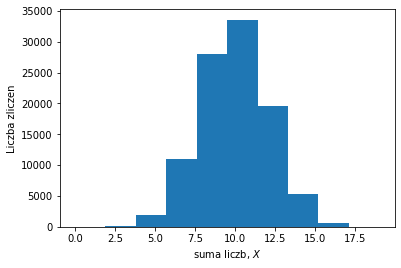

In [57]:
# zliczmy ile razy pojawiła się dana liczba X
plt.hist(dane, bins=10, density=False)
plt.xlabel(r"suma liczb, $X$")
plt.ylabel(r"Liczba zliczen")
plt.show()

In [59]:
# Jaki to kształ?
# Rozkład gaussowski

def f(x, mean, sigma):
  return np.exp(-(x-mean)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

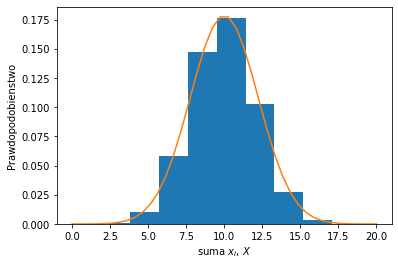

In [63]:
# próbkujemy funkcję f(x), tj. tworzymy ciąg liczb (x1, f(x1)), (x2, f(x2)), ...
# a potem go narysujemy na wykresie
xs = np.linspace(0,20,40)
fs = f(xs, 0.5* N, 0.5*np.sqrt(N))


plt.hist(dane, bins=10, density=True)
plt.plot(xs, fs)
plt.xlabel(r"suma $x_i$, $X$")
plt.ylabel(r"Prawdopodobienstwo")
plt.show()

## Korelacje - najprostszy opis zmiennych losowych

Zróbmy teraz eksperyment. Jak z losowości wydobyć prawidłowości?

Wylosujmy najpierw kilka ciągów $N$ liczb.

Ustalmy na przykład 10.

Losujemy więc

$$X_1,\ X_2,\ X_3,\ \ldots,\ X_8,\ X_9,\ X_{10}$$
Każda liczba $X_i$ może mieć wartość 0 lub 1.

Pytania:
* Czy jest jakaś zależność pomiędzy liczbą $X_1$ oraz liczbą $X_2$ albo $X_k$? 
* Jak to sprawdzić?

In [65]:
# Ustalmy N liczb, i powtórzmy losowanie N_powtorzen razy.
N = 10
N_powtorzen = 1000

# Losujemy!
dane = generator.integers(low=0, high=2, size=(N_powtorzen, N))
print("Kształt danych: dane.shape = ", dane.shape )

print("Kilka przykładów:")
for i in range(0,10):
  print(i, ": ", dane[i])
print(": :   ...")

Kształt danych: dane.shape =  (1000, 10)
Kilka przykładów:
0 :  [1 0 0 1 1 1 1 0 0 1]
1 :  [0 0 0 0 1 1 1 1 1 0]
2 :  [1 0 0 0 0 0 0 1 1 0]
3 :  [0 1 1 1 1 0 0 1 0 0]
4 :  [0 0 1 0 0 1 1 1 0 1]
5 :  [1 0 0 1 1 0 1 1 0 1]
6 :  [0 1 0 1 1 0 1 0 1 1]
7 :  [0 0 0 0 1 1 0 1 0 1]
8 :  [0 1 1 0 0 1 1 0 0 1]
9 :  [0 1 1 1 0 0 0 1 1 1]
: :   ...


Policzymy średnią wartość oraz odchylenie standardowe

In [67]:
# policzmy średnią w zero-wym i n-tym punkcie
def srednie(data, n):
  mean_0 = np.mean(data[::, 0]) # punkt zerowy
  mean_n = np.mean(data[::, n]) # punkt n-ty
  return mean_0, mean_n

In [69]:
srednie(dane, 3)

(0.498, 0.49)

**Korelacja**

Liczymy teraz **korelację**:
$$ g_n = \big\langle \big( X_0 - \langle X_0\rangle \big) \big( X_n - \langle X_n\rangle \big) \big\rangle$$

Uwagi:
* Jeśli zmienne $X_0$ i $X_n$ są niezależne, to korelacja jest zero, $g_n=0$.
* Jeśli jest jakaś między nimi zależność, to korelacja jest niezerowa.

In [70]:
# policzmy korelację pomiędzy n-tym punktem a zero-wym
def corr(data, n):
  mean_0 = np.mean(data[::, 0]) # punkt zerowy
  mean_n = np.mean(data[::, n]) # punkt n-ty
  wynik = np.mean((data[::,0] - mean_0)*(data[::,n] - mean_n))
  return wynik

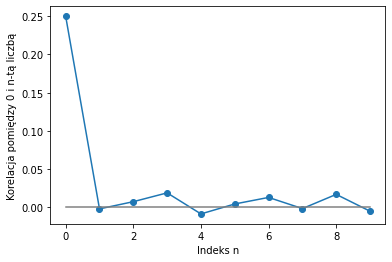

In [71]:
corrs = [ corr(dane, n) for n in range(0,N)]

import matplotlib.pyplot as plt
plt.plot(corrs, "o-"),
plt.plot(range(0,N), [0]*N,"-", color="gray")
plt.xlabel("Indeks n")
plt.ylabel("Korelacja pomiędzy 0 i n-tą liczbą")
plt.show()

Co jeśli podmienimy np. 6-tą liczbę?

Zróbmy taki żart. Powiedzmy, że bierzemy 6-tą liczbę. Zamiast niej podstawiamy w danym ciągu wartość 1-szej liczby.


In [72]:
# kopujemy dane, żeby mieć porównanie
daneJoke = dane.copy()

# podstawiamy X_1 -> X_6:
for i in range(len(daneJoke)):
  liczby = daneJoke[i]
  liczby[5] = liczby[0] # indeksujemy od zera (tj, liczby[0], liczby[1], ...), a więc liczbie X_6 odpowiada liczby[5]

In [73]:
print(dane[15])
print(daneJoke[15])

[1 1 1 1 1 0 0 0 1 0]
[1 1 1 1 1 1 0 0 1 0]


In [74]:
print("Jak wyglądają dane?")
for i in range(0,10):
  print(i, ": ", daneJoke[i])
print(": :   ...")

print("Czy widać tu jakaś nielosowość?")

Jak wyglądają dane?
0 :  [1 0 0 1 1 1 1 0 0 1]
1 :  [0 0 0 0 1 0 1 1 1 0]
2 :  [1 0 0 0 0 1 0 1 1 0]
3 :  [0 1 1 1 1 0 0 1 0 0]
4 :  [0 0 1 0 0 0 1 1 0 1]
5 :  [1 0 0 1 1 1 1 1 0 1]
6 :  [0 1 0 1 1 0 1 0 1 1]
7 :  [0 0 0 0 1 0 0 1 0 1]
8 :  [0 1 1 0 0 0 1 0 0 1]
9 :  [0 1 1 1 0 0 0 1 1 1]
: :   ...
Czy widać tu jakaś nielosowość?


Policzmy jednak korelację!

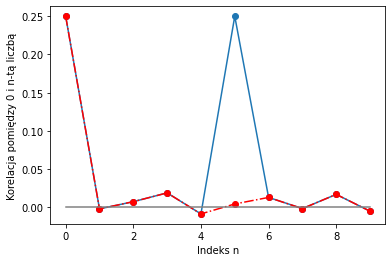

In [77]:
# chcemy teraz narysować korelacje: g_0, g_1, g_2, ...

corrs = [ corr(dane, n) for n in range(0,N)]
corrsJoke = [ corr(daneJoke, n) for n in range(0,N)]

import matplotlib.pyplot as plt
plt.plot(corrsJoke, "o-"),
plt.plot(corrs, "o-.r"),
plt.plot(range(0,N), [0]*N,"-", color="gray")
plt.xlabel("Indeks n")
plt.ylabel("Korelacja pomiędzy 0 i n-tą liczbą")
plt.show()

# Ćwiczenia z liczbami losowymi

## Ćwiczenie \#1 - losowy żart

Napisz program, który losuje liczbę losową 0 lub 1. Jeśli wylosował 0, nie podmieniaj liczby. Jeśli wylosował 1, podmień liczbę. Jak wygląda teraz korelacja?

Użyj komendy `if/elif/else`.
Działa ona w następujący sposób:

In [ ]:
if warunek1:
    # zrób coś jeśli warnek1 jest prawdziwy
elif warunek2:
    # zrób coś, jeśli warunek2 jest prawdziwy
else:
    # zróļ coś, jeśli wszystkie warunki są fałszywe

In [ ]:
# Tu wpisz kod
# ...
# ...
# ...



## Ćwiczenie #1: rozwiązanie

Jak wyglądają dane?
0 :  [1 0 0 1 1 1 1 0 0 1]
1 :  [0 0 0 0 1 0 1 1 1 0]
2 :  [1 0 0 0 0 0 0 1 1 0]
3 :  [0 1 1 1 1 0 0 1 0 0]
4 :  [0 0 1 0 0 1 1 1 0 1]
5 :  [1 0 0 1 1 1 1 1 0 1]
6 :  [0 1 0 1 1 0 1 0 1 1]
7 :  [0 0 0 0 1 0 0 1 0 1]
8 :  [0 1 1 0 0 1 1 0 0 1]
9 :  [0 1 1 1 0 0 0 1 1 1]
: :   ...
Teraz jeszcze trudniej zobaczyć jakąś prawidłowość, prawda?
A jednak, korelacja to 'widzi'.


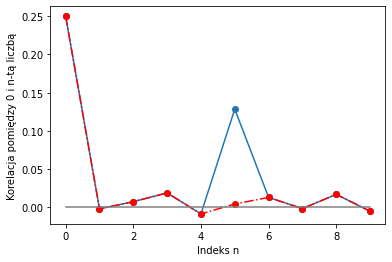

In [82]:
daneJoke2 = dane.copy()

for i in range(len(daneJoke2)):
  liczby = daneJoke2[i]

  # losujemy liczbę, w zależności od wartości podejmiemy decyzję o podmianie
  r = generator.integers(0,2) 
  if r == 0:
    liczby[5] = liczby[0]
  # jeśli r != 0 nie robimy nic, więc nie potrzebujemy reszty instrukcji

print("Jak wyglądają dane?")
for i in range(0,10):
  print(i, ": ", daneJoke2[i])
print(": :   ...")
print("Teraz jeszcze trudniej zobaczyć jakąś prawidłowość, prawda?")
print("A jednak, korelacja to 'widzi'.")

corrs_Joke2 = [ corr(daneJoke2, n) for n in range(0,N)]

plt.plot(corrs_Joke2, "o-"),
plt.plot(corrs, "o-.r"),
plt.plot(range(0,N), [0]*N,"-", color="gray")
plt.xlabel("Indeks n")
plt.ylabel("Korelacja pomiędzy 0 i n-tą liczbą")
plt.show()

## Ćwiczenie \#2 - Wracając z imprezy...

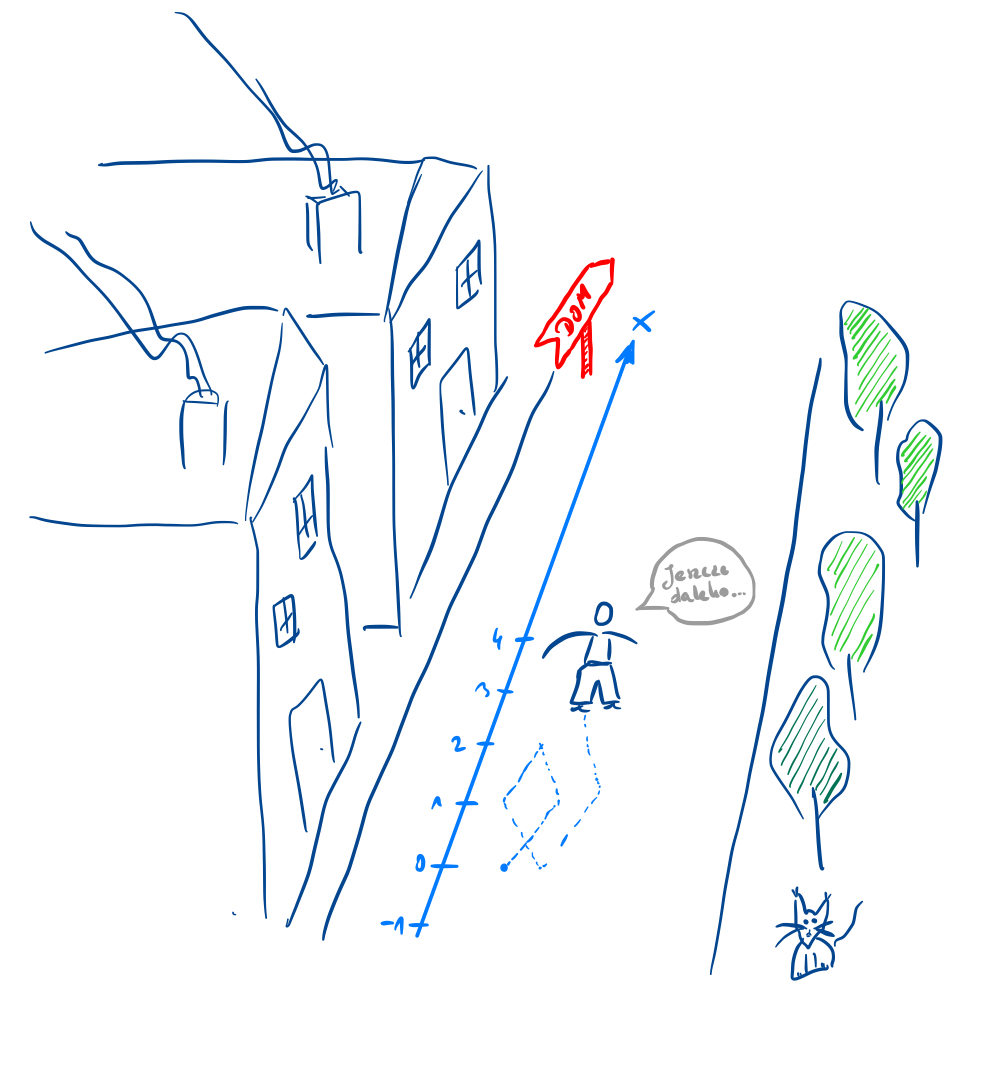

Wyobraźmy sobie studenta lub studentkę, który tak bardzo się cieszył, że zdał trudny egzamin podczas sesji, że postanowił uczcić swoje osiągnięcie. Wraca teraz do domu idąc ulicą, ale kroki z trudem stawia i nie bardzo wie, w którą stronę iść, ponieważ jest tak zmęczony. Czasem stawia więc krok do przodu, a czasem krok do tyłu... 

Pytanie, jak daleko dojdzie?....

Spróbujmy to oszacować, gdzie znajdzie się po $n$ krokach.

Oznaczmy:
* $d$ - długość kroku
* $X_k = \pm d$ - $k$-ty krok, jeśli dodatni, to idzie do przodu, jeśli ujemny to do tyłu
* $s_n = \sum_{k=0}^n X_k$ - całkowity dystans po $n$ krokach

$X_k$ jest zmienną losową, ponieważ nie wiemy, w którą stronę osoba postawi krok.

In [83]:
# długość kroku
d = 1.0 # np w metrach

# wylosujmy n kroków
n_krokow = 100

# zobaczmy poniżej, że losujmey 0 lub 1, chcemy jednak, żeby wartości losowe wynosiły -1 lub 1. Możemy to łatwo uzyskać stosując transformację: {0,1} = x -> y = 2 x - 1 = {-1, 1}
kroki = generator.integers(low=0, high=2, size=n_krokow) 
kroki = 2*kroki -1
kroki = d*kroki  # nadajemy skalę: jeden krok odowiada dystansowi d

kroki

array([ 1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,
       -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,
       -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
        1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,
       -1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.])

In [84]:
# Jak daleko dojdzie po n krokach?
dystans_n = np.sum(kroki)

print(f"Osoba zrobiła {n_krokow} kroków, a pokonała dystans {dystans_n} metrów.\nCzy to dużo?")

Osoba zrobiła 100 kroków, a pokonała dystans -6.0 metrów.
Czy to dużo?


Zbadajmy to zagadnienie dokładniej. Stwórzmy najpierw funkcję, która generuje dystans po $n$ krokach.

In [85]:
# generujemy dostans przebyty aż do n kroków 

def trajektoria(n, d):
  kroki = generator.integers(low=0, high=2, size=n) 
  kroki = 2*kroki -1
  kroki = d*kroki

  return np.concatenate((np.array([0.,]), np.cumsum(kroki)))


In [86]:
trajektoria(10, d)

array([ 0., -1., -2., -1., -2., -1., -2., -3., -4., -3., -2.])

Zrozumiemy zagadnienie, a więc na czym polega zjawisko, jeżeli przyjrzymy się wielu takim osobom. Każdy jest inny, ale tylko powtarzając jakieś zjawisko, możemy zrozumieć leżace u podstaw mechanizmy.

In [87]:
# załóżmy, że każdą osobę obserwujemy przez n_kroków (tu np. 30)
# załóżmy, że obserwujemy konkretną liczbę osób (np. tutaj ile_osob=10)

n_krokow = 30
ile_osob = 10
trajektorie_wiele_osob = [trajektoria(n_krokow, d) for n in range(ile_osob)]

In [88]:
print(trajektorie_wiele_osob[0])
print(trajektorie_wiele_osob[1])

[ 0. -1.  0. -1. -2. -1.  0.  1.  2.  1.  2.  1.  2.  1.  2.  1.  0.  1.
  0. -1. -2. -1. -2. -3. -2. -3. -2. -3. -4. -3. -2.]
[  0.  -1.  -2.  -3.  -2.  -3.  -2.  -1.   0.  -1.  -2.  -1.  -2.  -3.
  -4.  -3.  -2.  -3.  -4.  -3.  -4.  -5.  -4.  -5.  -6.  -7.  -8.  -9.
  -8.  -9. -10.]


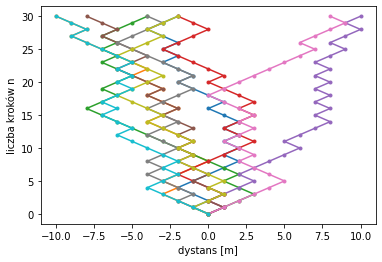

In [90]:
import matplotlib.pyplot as plt

for i in range(ile_osob):
  plt.plot(trajektorie_wiele_osob[i], np.arange(n_krokow+1), ".-")
plt.xlabel("dystans [m]")
plt.ylabel("liczba kroków n")
plt.show()

Widzimy, że te osoby nie dochodzą bardzo daleko...
Przejdźmy teraz do takiej sytuacji, w której mamy wiele tysięcy takich osób.
I zapytajmy, ile osób osiągnęło po n krokach jakiś konkretny dystans.

In [91]:
n_krokow = 100
ile_osob = 2000
trajektorie_wiele_osob = [trajektoria(n_krokow, d) for n in range(ile_osob)]
trajektorie_wiele_osob = np.array(trajektorie_wiele_osob)

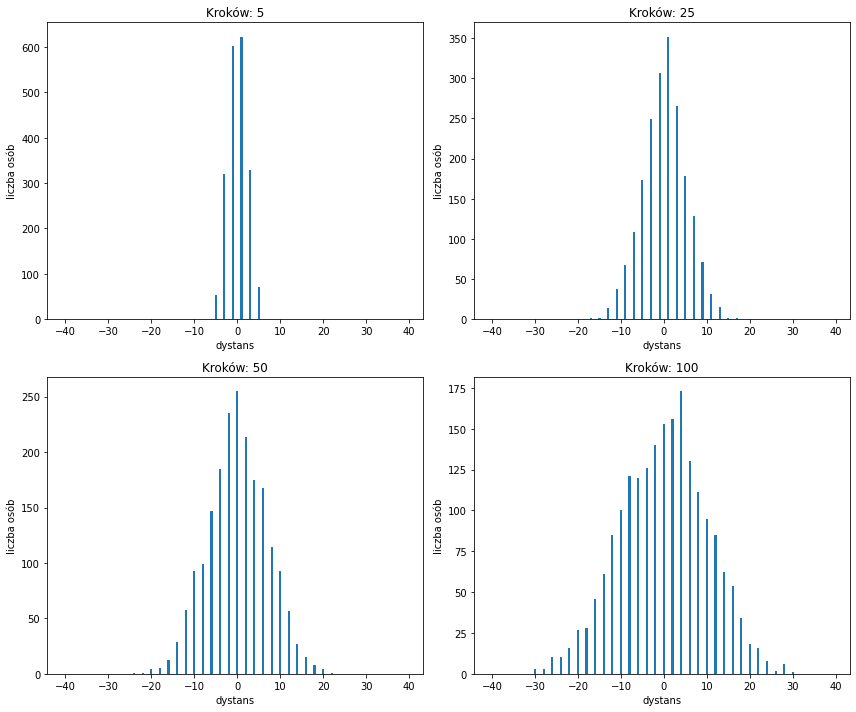

In [92]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
steps = 5
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-40,40,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')


plt.subplot(2, 2, 2)
steps = 25
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-40,40,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')

plt.subplot(2, 2, 3)
steps = 50
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-40,40,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')

plt.subplot(2, 2, 4)
steps = 100
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-40,40,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')

plt.tight_layout()
plt.show()


## Ćwiczenie \#3 - proces "błądzenie losowe" ("random walk")

Załóżmy, że osoba jednak ma jednak większą szansę na krok do przodu niż na krok w tył. Jak wygląda wtedy rozkład prawdopodobieństwa?

In [ ]:
# tu wpisz swój kod...
# użyj funkcji np.random.choice

# ...
# ...
# ...

## Ćwiczenie \#3 - rozwiązanie

In [96]:
# generujemy dostans przebyty aż do n kroków 

def trajektoria_p(n, d, p):
  kroki = np.random.choice([-1,1], p =[1-p, p], size=n)
  kroki = d*kroki

  return np.concatenate((np.array([0.,]), np.cumsum(kroki)))


In [97]:
n_krokow = 100
ile_osob = 2000

# prawdopodobieństwo ruszenia do przodu
p_val = 0.9

trajektorie_wiele_osob = [trajektoria_p(n_krokow, d, p_val) for n in range(ile_osob)]
trajektorie_wiele_osob = np.array(trajektorie_wiele_osob)

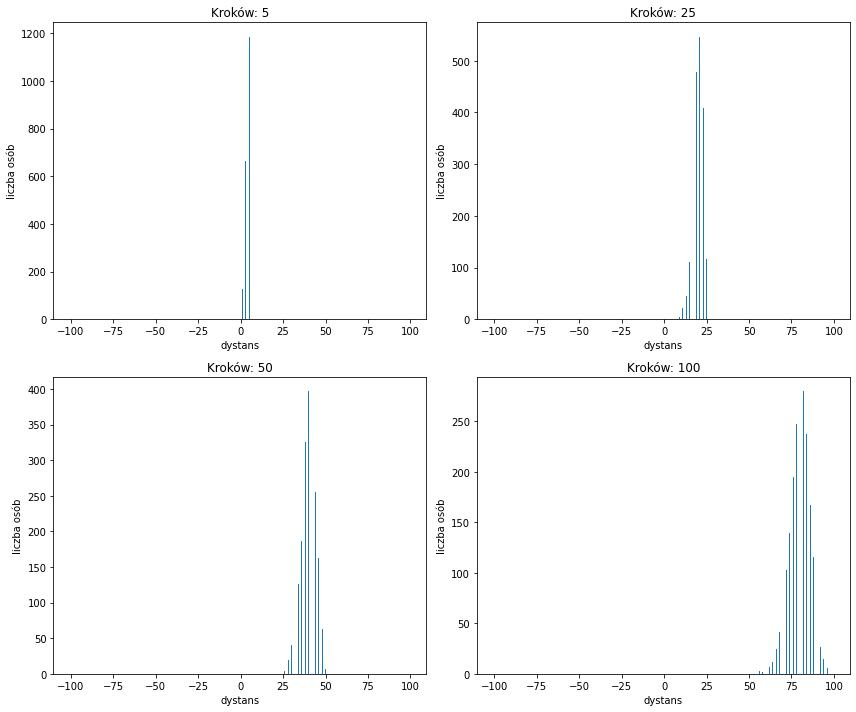

In [98]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
steps = 5
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-100,100,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')


plt.subplot(2, 2, 2)
steps = 25
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-100,100,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')

plt.subplot(2, 2, 3)
steps = 50
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-100,100,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')

plt.subplot(2, 2, 4)
steps = 100
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-100,100,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')

plt.tight_layout()
plt.show()


In [99]:
# zastaówmy się jeszcze jaka jest szerokość rozkładu po n krokach
# szerokość, czyli odchylenie od średniej, czyli np.std

def szerokosc(n, trajektorie):
  dane = trajektorie_wiele_osob[::,n]
  return np.std(dane)


def srednia(n, trajektorie):
  dane = trajektorie_wiele_osob[::,n]
  return np.mean(dane)

In [100]:
szerokosci = [szerokosc(n, trajektorie_wiele_osob) for n in range(n_krokow)]
srednie = [srednia(n, trajektorie_wiele_osob) for n in range(n_krokow)]

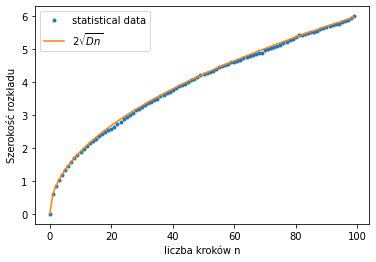

In [101]:
ns = np.arange(n_krokow)

# diffusion coefficient
Dval = (p_val)*(1-p_val)

plt.plot(ns, szerokosci, ".", label="statistical data")
plt.plot(ns, 2.0*np.sqrt(Dval * ns), label=r"$2 \sqrt{D n}$")
plt.xlabel("liczba kroków n")
plt.ylabel("Szerokość rozkładu")
plt.legend(loc='upper left')
plt.xscale("linear")
plt.yscale("linear")
plt.show()

Średnia prędkość wynosi v = 0.8 d/krok


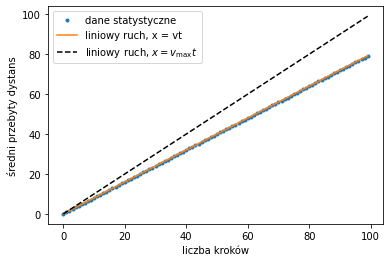

In [105]:
ns = np.arange(n_krokow)

# średnia prędkość, zauważ że v<1
v = (2*p_val-1)
print(f"Średnia prędkość wynosi v = {v} d/krok")

plt.plot(ns, srednie, ".", label="dane statystyczne")
plt.plot(ns, (2*p_val-1) * ns , label="liniowy ruch, x = vt")
plt.plot(ns, ns , label=r"liniowy ruch, $x = v_\mathrm{max}t$", linestyle="dashed", c="k")

plt.xlabel("liczba kroków")
plt.ylabel("średni przebyty dystans")
plt.xscale("linear")
plt.yscale("linear")
plt.legend()
plt.show()

# Generowanie liczb losowych z rozkładów

## Płaski rozkład

Nauczmy się najpierw generować liczby losowe z przedziału [0,1]. Jest to bardzo użyteczne.

In [ ]:
import numpy as np

seed=12345
generator = np.random.default_rng(seed)

In [ ]:
# losujemy [-0,1)

Nm = 1000
rs = generator.uniform(0,1, size=Nm)

[0.18900457 0.98205423 0.01855316 0.17641098 0.29904138 0.24859752
 0.06025141 0.40278318 0.23971136 0.33286572 0.10750705 0.8647309
 0.78604183 0.01477204 0.03174591 0.66620029 0.27047908 0.35547667
 0.48513515 0.9451055 ]


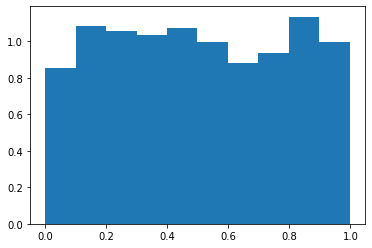

In [ ]:
plt.hist(rs, density=True)
print(rs[0:20])

## Dowolny rozkład, metoda #1 - metoda inwersji

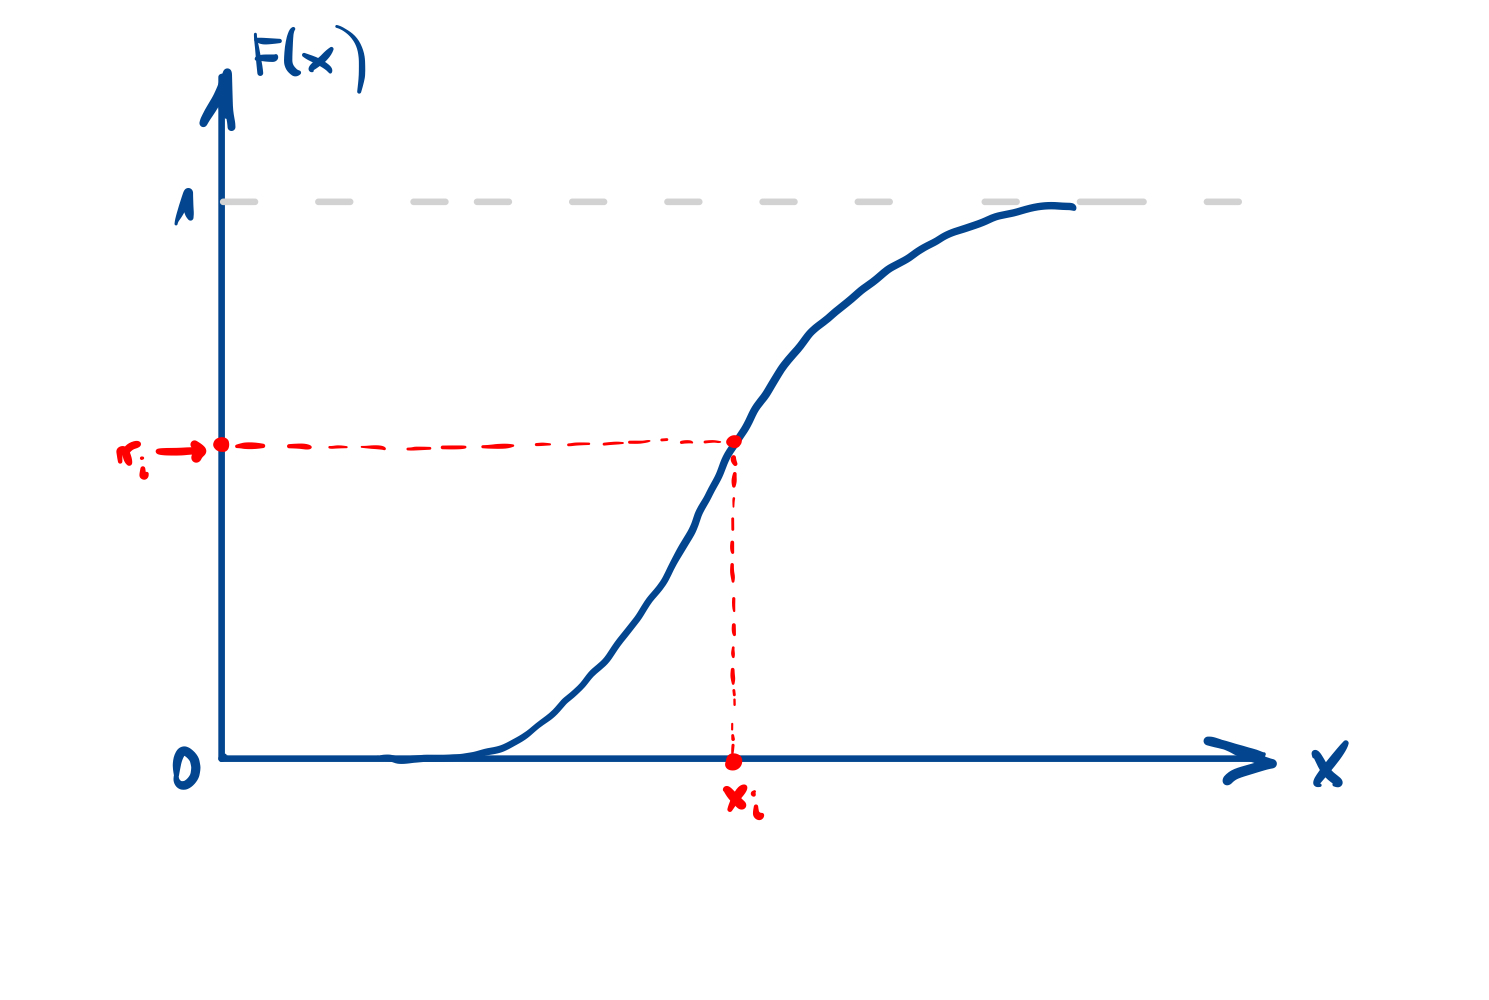

**Metoda**  

Mamy zadany rozkład $p(x)$.   
Taki rozkład spełnia $p(x)\geqslant0$ oraz $\int_{-\infty}^{\infty}p(x)dx = 1.$   
Wyznaczmay funkcję $F(x) = \int_{-\infty}^{x}p(z)dz$.   
Zauważmy, że $0 \leqslant F(x) \leqslant 1$.

Losujemy $r\in [0,1]$. 
Znajdujemy $x$ takie, że $F(x) = r$.    
Wtedy $x$ są dane rozkładem $p(x)$.

**Przykład**

Zobaczmy jak to działa. Weźmy $p(x) = 2x $ na przedziale $[0,1]$.


Sprawdźmy, że $\int_{0}^1 2x dx = x^2 \big|^{x=1}_{x=0} = 1$.

Wyznaczamy $F(x) = \int_{0}^x 2s ds = x^2$.

Rozwiązujemy więc $r = F(x)$ i znajdujemy $x = \sqrt{r}$.

Sprawdźmy!

In [106]:
# nasz rozkłąd
def rozklad(x):
  return 2*x

# generujemy losowe x na podstawie losowych r z przedziału [0,1) 
def genX(r):
  return np.sqrt(r)

In [107]:
Nm=1000
rs = generator.uniform(0,1,size=Nm)

xs = genX(rs)

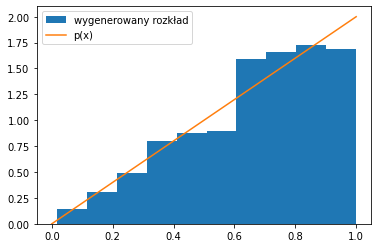

In [108]:
plt.hist(xs, density=True, label="wygenerowany rozkład")
plt.plot(np.linspace(0,1,100), rozklad(np.linspace(0,1,100)), label="p(x)")
plt.legend()
plt.show()

## Dowolny rozkład, metoda #2 - metoda odrzucania

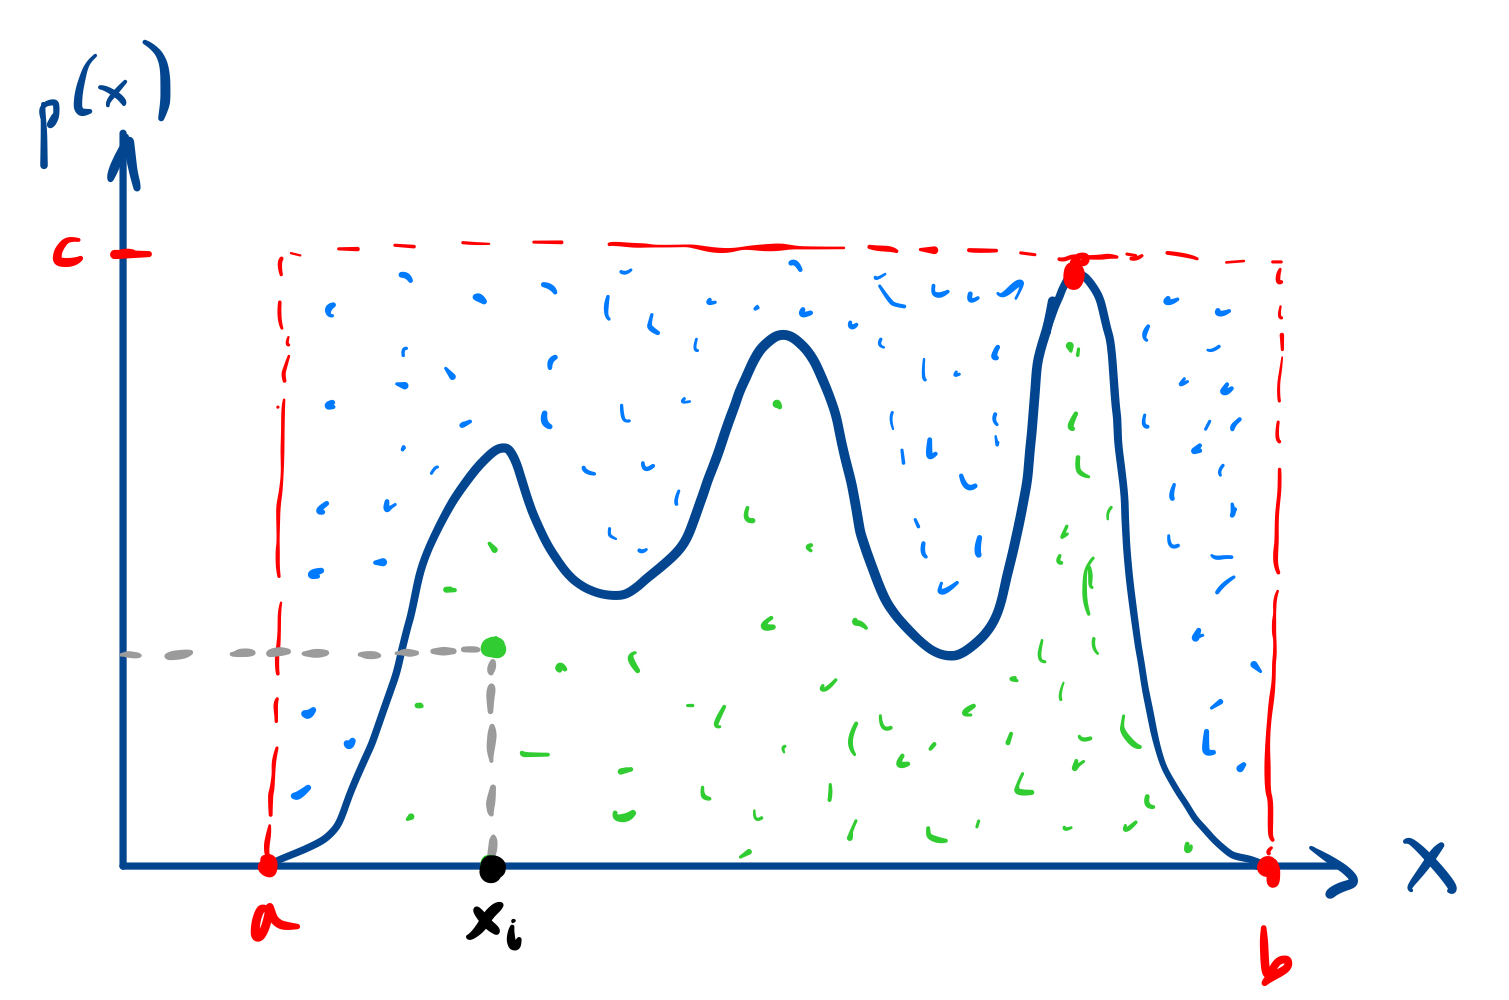

Metoda bazuje na geometrycznej interpretacji rozkładu prawdopodobieństwa. Zakładamy, że nasz rozkład prawdopodobieństwa $p(x)$ jest ograniczony $x\in[a,b]$ oraz $p(x) \leqslant c$ ma maximum równe $c$.

Procedura:
1. Zamknij $p(x)$ w prostokącie ograniczonym przez $x=a$, $x=b$, $y=0$ oraz $y=c$. Rozmiar prostokąta $(b-a) \times c$.
2. Wylosuj teraz punkt $p = (x,y)$, aby znajdował się w prostokącie. Wylosuj takich punktów bardzo dużo, aby jednorodnie pokryły prostokąt.
Jeśli prostokąt jest duży, potrzebujemy baaaardzo dużo punktów.
3. Jeśli dany punkt $(x,y)$ jest taki, że $y\leqslant p(x)$, tzn. leży pod krzywą (punkty zielone), to $x$ zaakceptuj. W przeciwnym razie (punkty niebieskie) odrzuć.

Zaakceptowane punkty $x$ (zielone) mają rozkład $p(x)$.

Zobaczmy jak to działa.

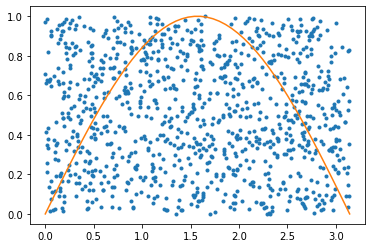

In [113]:
# chcemy wygenerować x dane rozkładem p(x) = sin(x) dla 0<x<pi

x_tab = np.linspace(0,np.pi, 50)
y_tab = np.sin(x_tab)


# losujemy liczby
Nm=10**3
xs = generator.uniform(0, np.pi, size=Nm)
ys = generator.uniform(0, 1, size=Nm)

# mamy pary (x,y)
# dla każdego y wybieramy x tlko wtedy, gdy y <= sin(x)
# wbrany zbiór x nazywamy Xs
sins = np.sin(xs)
Xs = xs[ys<=sins]


plt.plot(xs,ys,".")
plt.plot(x_tab, y_tab, "-")
plt.show()

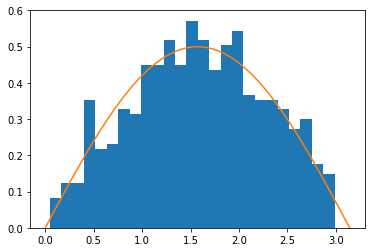

In [114]:
plt.hist(Xs,bins = 25, density=True)
plt.plot( np.linspace(0,np.pi), 0.5*np.sin(np.linspace(0,np.pi)), label="0.5*sin(x)")

# Ćwiczenia z liczbami losowymi

## Ćwiczenie #1 - rozkład wykładniczy

Często czas $t \geqslant 0 $ pomiędzy jakimiś wydarzeniami jest opisany rozkładem wykładniczym. Jak go wylosować? 

Rozkład prawdopodobieństwa jest opisany przez $p(t) = \lambda e^{- \lambda t}$, gdzie $\lambda$ jest skalą zaniku (wymiar 1/czas).

Użyj metody inwersji.

## Ćwiczenie #2 - rozkład dyskretny $\{0,1\}$ z prawdopodobieństwem $\{p, 1-p\}$

Wykorzystując metodę inwersji wygeneruj liczby 0 z pradopodobieństwem p
oraz liczby 1 z prawdopodbieństwem 1.

In [ ]:
# wpisz tu swój kod
# ...
# ...
# ...

## Ćwiczenie #2 - rozwiązanie

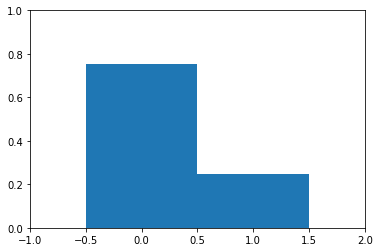

In [ ]:
pval = 0.75

def cdf(r, pval):
  if r <= pval:
    return 0
  elif r > pval:
    return 1

# generujemy zbiór { r } and { cdf(r) }
rs = generator.uniform(0,1,size=10000)
ys = np.array(list(map( lambda x: cdf(x, pval), rs)))

# histogram
plt.hist(ys, density=True, bins=[0,1,2], align="left") 
plt.xlim(-1,2)
plt.ylim(0,1)
plt.show()

## Ćwiczenie #3 - rozkład na sferze

Mając do dyspozycji liczby losowe, możemy użyć ich do wygenerowania punktów na sferze.

Punkt na sferze możemy sparametryzować poprzez punkt na sferze:
$$\mathbf{r} = (\sin\theta \cos\phi, \sin\theta \sin\phi, \cos\theta)$$.

Zobaczmy, że dla dowolnych kątów $(\theta,\phi)$ wektor $\mathbf{r}$ jest unormowany $\mathbf{r}^2 = 1$.

Aby pokryć całą sferę, wylosujemy liczby losowe $\theta \in [0,\pi)$ oraz $\phi \in [0,2\pi)$.

Zobaczmy jak to wygląda.

## Ćwiczenie #3 - rozwiązanie

In [ ]:
# losujemy kąty theta

import numpy as np

seed=12345
generator = np.random.default_rng(seed)

# ile punktów w każdym wymiarze?
Ntheta, Nphi = 2000,2000
thetas = generator.uniform(0, np.pi, size=Ntheta)
phis = generator.uniform(0,2*np.pi, size=Nphi)

Jak punkty leżą na płaszczyźnie $(\theta,\phi)$?

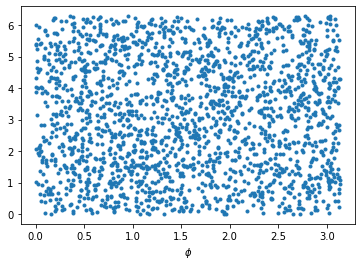

In [ ]:
plt.plot(thetas,phis, ".")
plt.xlabel(r"$\theta$")
plt.xlabel(r"$\phi$")
plt.show()

Wyglądają na dość jednorodnie rozłożone w płaszczyźnie. 

Ale jak wyglądają na sferze?

Sprawdźmy!

In [ ]:
def position(angle):
  theta,phi = angle
  out = np.array([np.sin(theta) * np.cos(phi),
    np.sin(theta) * np.sin(phi),
    np.cos(theta)])
  return out

In [ ]:
# generujemy pozycje na sferze (x,y,z)
points = zip(thetas,phis)
ps = map(position, points)
ps = np.array(list(ps))

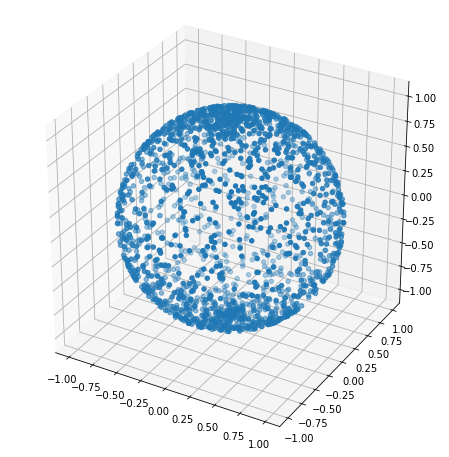

In [ ]:
# narysujmy 3d
fig = plt.figure(figsize=(10,8)) 
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect((1,1,1))  # ustaw rozmiary pudełka 1:1:1

ax.scatter(ps[:,0], ps[:,1], ps[:,2],".")
plt.show()

Widoczne jest zgrupowanie punktów wokół biegunów... 
Jak to usunąć?

Okazuje się, że ważne jest generowanie kąta $\theta$ danego rozkładem $\sin\theta$. 

Dlaczego?

Otóż całka po sferze, która ma wyrażać średnią z jakiejś funkcji, tzn. 
$$\langle f(\mathbf{r})\rangle = \iint_{\mathrm{sfera}}d^2r f(\mathbf{r})$$
w zmiennych biegunowych $(\theta,\phi)$ przyjmuje postać
$$\langle f(\mathbf{r})\rangle = \int_{0}^\pi d\theta \int_{0}^{2\pi}\!\! d\phi\,  \sin\theta f(\mathbf{\theta,\phi})$$.
Otrzymujemy więc dodatkowy $\sin\theta$, którego nie uwzględniliśmy. 

Zobaczmy co się stanie, jak go uwzględnimy.

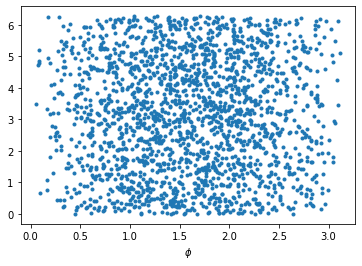

In [ ]:
Ntheta, Nphi = 2000,2000
thetas = np.arccos(generator.uniform(-1, 1, size=Ntheta))
phis = generator.uniform(0,2*np.pi, size=Nphi)


plt.plot(thetas,phis, ".")
plt.xlabel(r"$\theta$")
plt.xlabel(r"$\phi$")
plt.show()

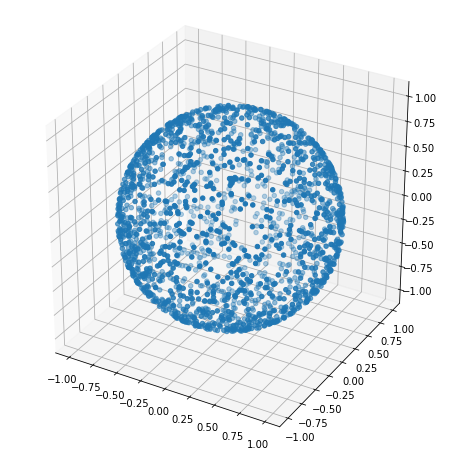

In [ ]:
# generate the position on the sphere (x,y,z), where ea
points = zip(thetas,phis)
ps = map(position, points)
ps = np.array(list(ps))

# narysujmy 3d
fig = plt.figure(figsize=(10,8)) 
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect((1,1,1))  # ustaw rozmiary pudełka 1:1:1

ax.scatter(ps[:,0], ps[:,1], ps[:,2],".")
plt.show()

Wygląda dużo lepiej!

## Ćwiczenie #4 - interferencja elektronów

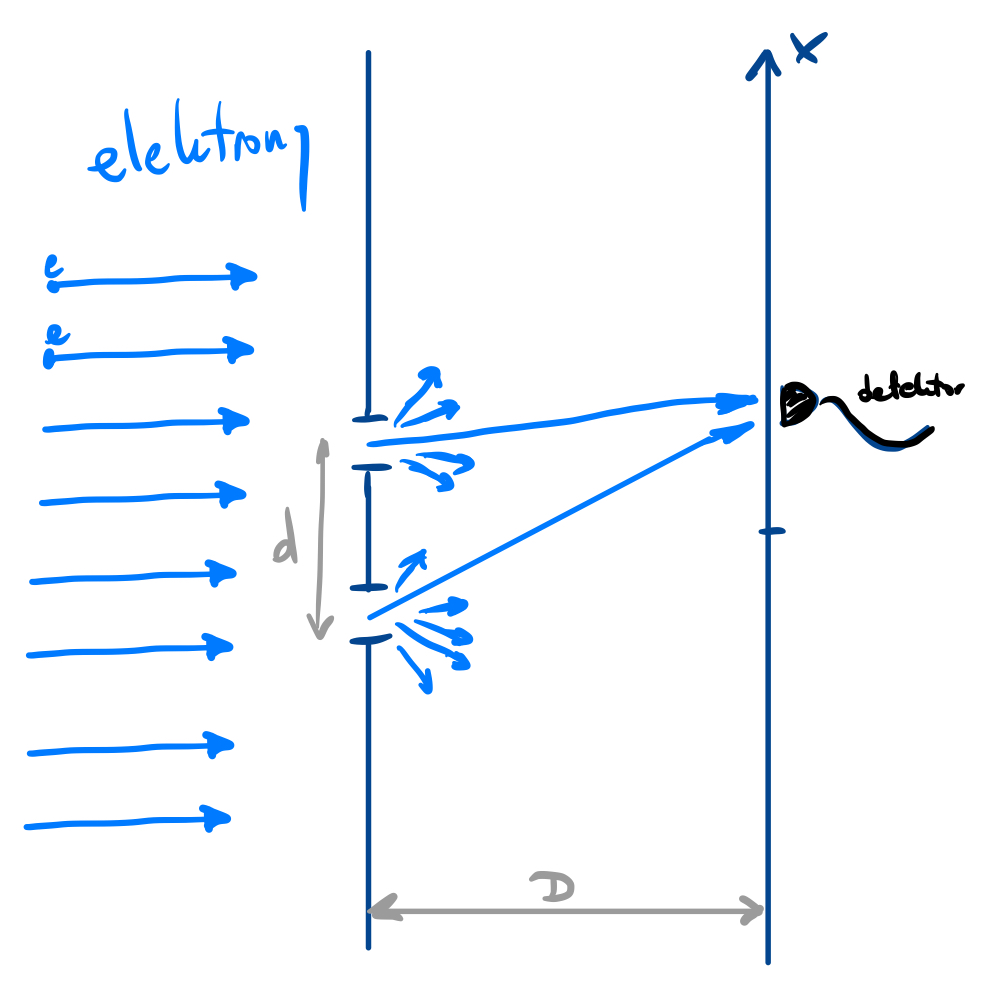

Załóżmy, że mamy wiązkę elektronów przechodzącą przez dwie szczeliny oddalone od siebie o odległość $d$. Pytanie, jak wygląda rozkład zliczeń elektronów w zależności od położenia na dalekim ekranie.

Można to policzyć!

In [ ]:
# uzyj ponizszy kod do generowania prawdopodobienstwa

# Funkcja: prawdopodob(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma)
# Zwraca: prawdopodobieństwo zliczenia detektora wokół x
# Uwaga: jako funkcja x nie jest unormowana, a więc jest tylko proporcjonalna do prawdopodobieństwa
#
#
# Zmienne:
# x - pozycja na detektorze
# v - prędkość elektronów
# d - odległośc pomiędzy szczelinami
# gorna_otwarta - True jeśli górna przegroda jest otwarta, False jeśli nie
# dolna_otwarta - True jeśli dolna przegroda jest otwarta, False jeśli nie



##
## KOD
##

# górna szczelina
def R_up(x, d, D):
  return np.sqrt((x-d/2)**2+D**2)

# dolna szczelina
def R_down(x, d, D):
  return np.sqrt((x+d/2)**2+D**2)

# amplituda przejścia z górnej szczeliny
def A_up(x, v, d, D, sigma):
  R = R_up(x, d, D)
  return np.exp(1.0j * v* R)/R * np.exp(-(x-d)**2/sigma**2)

# amplituda przejścia z dolnej szczeliny
def A_down(x, v, d, D, sigma):
  R = R_down(x, d, D)
  return np.exp(1.0j * v* R)/R * np.exp(-(x+d)**2/sigma**2)

def A(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma):
  return gorna_otwarta * A_up(x, v, d, D, sigma) + dolna_otwarta * A_down(x, v, d, D, sigma)

def prawdopodob(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma):
  return np.abs(A(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma))**2

## Ćwiczenie #4 - rozwiązanie


In [1]:
import numpy as np

In [2]:
# uzyj ponizszy kod do generowania prawdopodobienstwa

# Funkcja: prawdopodob(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma)
# Zwraca: prawdopodobieństwo zliczenia detektora wokół x
# Uwaga: jako funkcja x nie jest unormowana, a więc jest tylko proporcjonalna do prawdopodobieństwa
#
#
# Zmienne:
# x - pozycja na detektorze
# v - prędkość elektronów
# d - odległośc pomiędzy szczelinami
# gorna_otwarta - True jeśli górna przegroda jest otwarta, False jeśli nie
# dolna_otwarta - True jeśli dolna przegroda jest otwarta, False jeśli nie



##
## KOD
##

# górna szczelina
def R_up(x, d, D):
  return np.sqrt((x-d/2)**2+D**2)

# dolna szczelina
def R_down(x, d, D):
  return np.sqrt((x+d/2)**2+D**2)

# amplituda przejścia z górnej szczeliny
def A_up(x, v, d, D, sigma):
  R = R_up(x, d, D)
  return np.exp(1.0j * v* R)/R * np.exp(-(x-d)**2/sigma**2)

# amplituda przejścia z dolnej szczeliny
def A_down(x, v, d, D, sigma):
  R = R_down(x, d, D)
  return np.exp(1.0j * v* R)/R * np.exp(-(x+d)**2/sigma**2)

def A(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma):
  return gorna_otwarta * A_up(x, v, d, D, sigma) + dolna_otwarta * A_down(x, v, d, D, sigma)

def prawdopodob(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma):
  return np.abs(A(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma))**2

In [11]:
D = 40.0
d = 1.0
v = 20.0

Nm=1000
L = 100
xs = np.linspace(-L,L,Nm)
sigma = 40.0 # kolimacja

czy_gorna_otwarta = True
czy_dolna_otwarta = False #not False

ps = [prawdopodob(x, v, d, D, czy_gorna_otwarta, czy_dolna_otwarta, sigma) for x in xs]

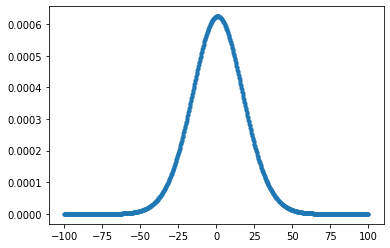

In [12]:
import matplotlib.pyplot as plt

plt.plot(xs, ps,".")
plt.show()

Dlaczego dostajemy coś takiego?
Jak wyglądają zliczenia na detektorze?

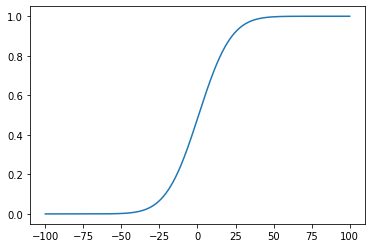

In [13]:
Ps = ps/np.sum(ps)

cPs = Ps.cumsum()

plt.plot(xs,cPs)

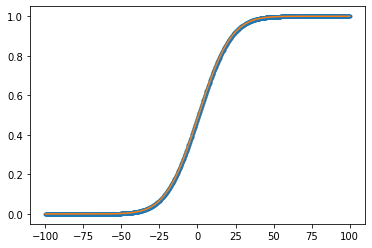

In [14]:
from scipy.interpolate import interp1d

# interpolujemy
it_cPs = interp1d(xs, cPs, kind="cubic")

plt.plot(xs,cPs, ".", label="original")
plt.plot(xs,it_cPs(xs), label="interpolated")

In [15]:
# odwracamy relację

genPos = interp1d(cPs, xs, kind="cubic")

# generujemy liczby losowe
seed=12345
generator = np.random.default_rng(seed)

Nelektronow = 5000
us = generator.uniform(0,1,size=Nelektronow)

# generujemy zliczenia elektronow
pos = genPos(us) 

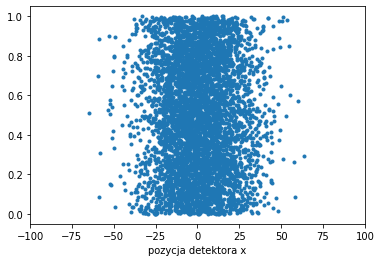

In [16]:
zs = generator.uniform(0,1,size=Nelektronow)

plt.plot(pos,zs, ".")
plt.xlim(-L,L)
plt.xlabel("pozycja detektora x")
plt.show()

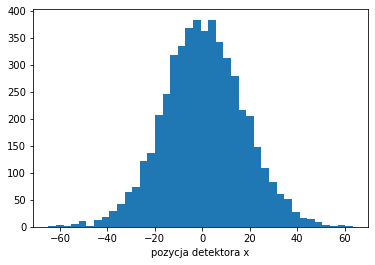

In [ ]:
plt.hist(pos,bins=40)
plt.xlabel("pozycja detektora x")
plt.show()

## Ćwiczenie #5 - obliczanie liczby $\pi$


Chcemy policzyć $I = \iint_\mathrm{koło} d^2r = \pi r^2$.
Zapisujemy $\iint_\mathrm{koło} d^2r = \iint_\mathrm{koło} d^2r f(x,y)$,
gdzie $f(x,y) = 1$ jeśli punkt $(x,y)$ jest w kole, oraz $f(x,y) = 0$ jeśli punkt $(x,y)$ jest poza kołem.
Teraz możemy rozciągnąć całkowanie na obszar kwadratu K: $-r \leqslant x,y \leqslant r$. I zapisać, że 
$$I = \iint_K f(x,y) = (2r)^2 \iint_K f(x,y) \frac{1}{(2r)^2}$$
Oznacza to, że liczymy średnią:
$$I = \langle f(x,y )\rangle$$
gdzie rozkładem jest jednorodny rozklad
$$p(x,y) = \frac{1}{(2r)^2}.$$


**Sprawdźmy jak to działa.**

Chcemy policzyć pole koła o promieniu $r=1$.
Losujemy liczby losowe w kwadracie $-1 \leqslant x \leqslant 1$ i $-1 \leqslant y \leqslant 1$, w którym koło się zawiera.

Akceptujemy tylko te punkty, które wpadają do koła.

In [ ]:
# wpisz kod 
# ...
# ...
# ...

## Ćwiczenie #5 - rozwiązanie

In [116]:
def f(x,y):
  if x**2+y**2<=1:
    return 1.0
  else:
    return 0.

In [117]:
# losujemy punkty z kwadratu K

Nm=10**4
xs = generator.uniform(-1,1,size=Nm)
ys = generator.uniform(-1,1,size=Nm)

pts = np.empty(len(xs))
for i in range(len(xs)):
  pts[i] = f(xs[i],ys[i])

In [118]:
print(f"Liczba pi wynosi = {4*pts.mean()}")
print(f"Błąd obliczenia pi wynosi = {4*pts.std()/np.sqrt(Nm)}")

Liczba pi wynosi = 3.1184
Błąd obliczenia pi wynosi = 0.016580655716828572


In [119]:
# Zdefiniujmy teraz generator liczby pi

def gen_pi(Nm):
  xs = generator.uniform(-1,1,size=Nm)
  ys = generator.uniform(-1,1,size=Nm)

  pts = np.empty(len(xs))
  for i in range(len(xs)):
    pts[i] = f(xs[i],ys[i])

  return 4*pts.mean()

Średnia z obliczonych liczb pi = 3.1398007999999997.
Oszacowany błąd obliczenia liczby pi = 0.005167179439500829.


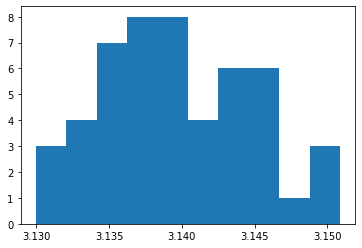

In [120]:
# wylosujmy dużo liczb pi, aby zobaczyć jaki popelniamy błąd

many_pi = [gen_pi(10**5) for i in range(50)]

plt.hist(many_pi)
print(f"Średnia z obliczonych liczb pi = {np.mean(many_pi)}.")
print(f"Oszacowany błąd obliczenia liczby pi = {np.std(many_pi)}.")

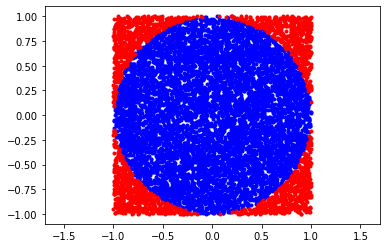

In [122]:
# jakie punkty bierzemy do zliczenia liczby 1 (niebieskie) a jakie nie (czerowne)?
inside=pts>0.5
outside=pts<0.5

plt.plot(xs[inside],ys[inside], "b.")
plt.plot(xs[outside],ys[outside], "r.")
plt.axis('equal')
plt.show()

# Obca cząstka w ośrodku - ruchy Browna

Wyobraźmy sobie, że w płynie umieszczone zostało ziarenko pyłku kwiatu. Czy coś można powiedzieć o ruchach takiego ziarenka?

Ruch takiego pyłku opisuje równanie Langevina:
$$ \frac{d^2}{dt^2}{x(t)} + \gamma \frac{d}{dt}{x(t)} = \xi(t),$$
gdzie $\gamma$ jest związana z lepkością cieczy i dyssypacją energii, a $\xi$ to siła działająca na pyłek.
Przyjmujemy tu jednostkową masę ciała $m=1$, dlatego nie pojawia się w równaniu Newtona.

Siła jest siłą losową, która pochodzi od zderzeń pyłku z cząstkami otaczającego go płynu.
Jej funkcja korelacji
$$ \langle \xi(t)\xi(t')\rangle = 2 \gamma k_B T. $$

Zauważmy, że losowa siła odpowiada za fluktuacje położenia i prędkości, ale pojawia się w niej również współczynnik $\gamma$. Jest to przejaw twierdzenia fluktuacyjno-dyssypacyjnego, które łączy losową siłę oraz dyssypację energii w układzie.

Jak to rozwiązać?


Zapiszmy równania najpierw, wprowadzając $dx(t)/dt = v(t)$ prędkość, jako:
$$
Y(t) = \begin{pmatrix}
x(t) \\
v(t) 
\end{pmatrix}
$$

Możemy wtedy zapisać
$$\frac{d Y(t)}{dt} = A \cdot Y(t) + 
\begin{pmatrix}
0 \\
\xi(t) 
\end{pmatrix}
$$.

Najprościej można to rozwiązać dyskretyzując równanie dla kroków $n\cdot \Delta t$:
$$Y_{n+1} = Y_n + A\cdot Y_n + W_n.$$
Okazuje się, że $W_n$ i $W_{n'}$ są gaussowskie, niezależne oraz $\langle W_n\rangle=0$ i $\langle W_n^2\rangle= 2 \gamma k_B T \Delta t$.

In [ ]:
# Oznaczmy Y(t) = [x(t), v(t)]
# Pamiętajmy, że Y to nie jest wektor kolumnowy.

seed=12345
generator = np.random.default_rng(seed)


def propagate(steps, dt, x0, v0, gamma, Gamma):
  Y = np.array([x0, v0])
  A = np.array([[0,1],[0, -gamma]])

  xis = np.sqrt(dt*Gamma)*generator.normal(0,1, size=steps)
  Ys = np.empty(shape=(steps+1, 2))
  Ys[0] = [x0,v0]

  for i in range(steps):
    Ys[i+1] = Ys[i] + Ys[i]@ (A.transpose()) * dt + np.array([0, xis[i]])

  return Ys

In [ ]:
dt = 0.01
x0 = 0.0
v0 = 0.0
gamma = 2.0
Temp = 10.0
Gamma = 2*gamma*Temp
steps = 300

trajs = [ propagate(300, dt, x0, v0, gamma, Gamma) for n in range(1000)]

In [ ]:
NPtrajs=np.array(trajs)

In [ ]:
NPtrajs[0,0:10]

array([[ 0.        ,  0.        ],
       [ 0.        , -0.90050602],
       [-0.00900506, -0.08324385],
       [-0.0098375 , -0.6322338 ],
       [-0.01615984, -0.78350467],
       [-0.02399488, -0.81548587],
       [-0.03214974, -1.26775275],
       [-0.04482727, -2.10746576],
       [-0.06590193, -1.6549206 ],
       [-0.08245113, -1.39346898]])

Final time t = 3.0


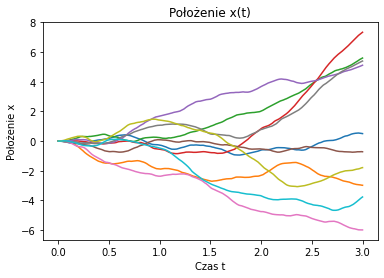

In [ ]:
ts = np.arange(NPtrajs.shape[1])*dt
print(f"Final time t = {ts[-1]}")

import matplotlib.pyplot as plt

for i in range(0,10):
  plt.plot(ts, NPtrajs[i,:,0])
plt.xlabel("Czas t")
plt.ylabel("Położenie x")
plt.title("Położenie x(t)")
plt.show()

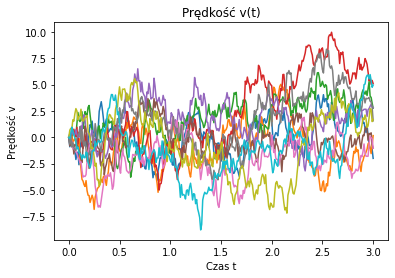

In [ ]:
for i in range(0,10):
  plt.plot(ts, NPtrajs[i,:,1])
plt.xlabel("Czas t")
plt.ylabel("Prędkość v")
plt.title("Prędkość v(t)")
plt.show()

In [ ]:
from scipy import stats

gs = stats.norm
def dist(v):
  return gs.pdf(v, loc=0, scale=np.sqrt(Temp))

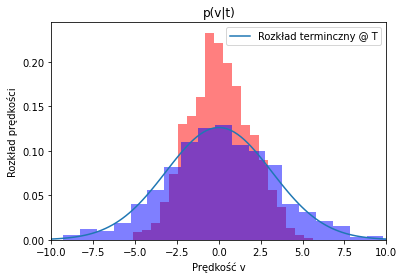

In [ ]:
vs = np.linspace(-10,10,100)
plt.hist(NPtrajs[:,10,1], density=True, alpha=0.5, bins=20, color="r")
plt.hist(NPtrajs[:,-1,1], density=True, alpha=0.5, bins=20, color="b")
plt.plot( vs,  dist(vs), label="Rozkład terminczny @ T")
plt.legend()

plt.xlim(-10,10)

plt.xlabel("Prędkość v")
plt.ylabel("Rozkład prędkości")
plt.title("p(v|t)")
plt.show()

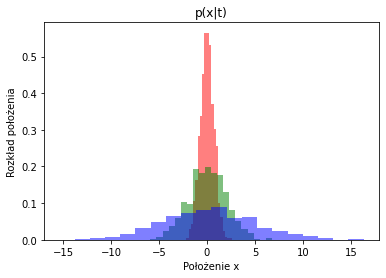

In [ ]:
plt.hist(NPtrajs[:,40,0], density=True, bins=20, alpha=0.5, color="r")
plt.hist(NPtrajs[:,100,0], density=True, bins=20, alpha=0.5, color="g")
plt.hist(NPtrajs[:,-1,0], density=True, bins=20, alpha=0.5,  color="b")

plt.xlabel("Położenie x")
plt.ylabel("Rozkład położenia")
plt.title("p(x|t)")
plt.show()

# Obca cząstka w kwantowym układzie - polaron

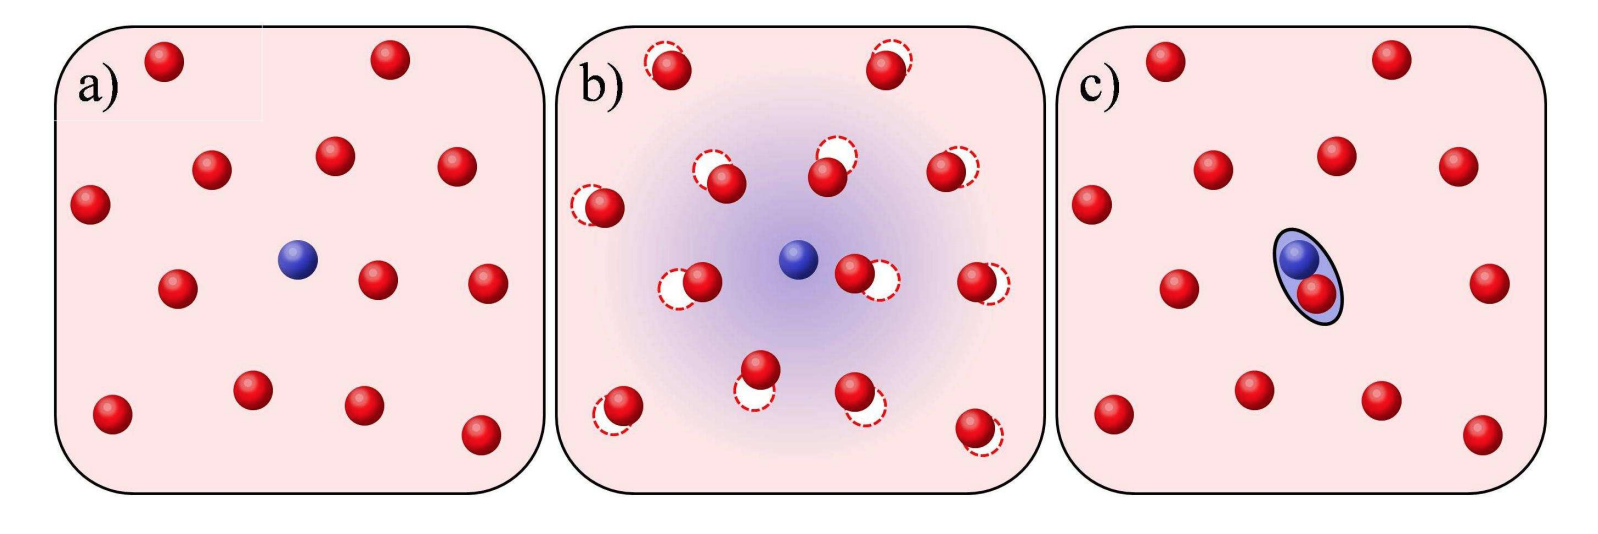

Żródło obrazka: A. Schirotzek, C. H. Wu, A. Sommer, M.W. Zwierlein, Phys. Rev. Lett. 102, 230402 (2009).

## Morze Fermiego

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Zdefiniujmy rozkład rozkład Fermiego-Diraca

def fermi(energy, mu, T):
  return 1/(np.exp((energy- mu)/T) + 1)

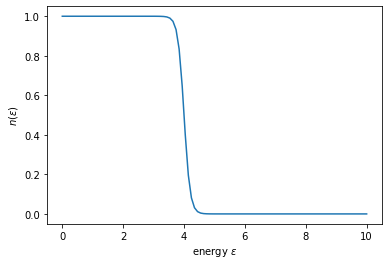

In [ ]:
# Zobaczmy jak to wygląda.

es = np.linspace(0,10,100)

mu = 4
T = 0.1
ns = fermi(es, mu, T)

plt.plot(es, ns)
# { “linear”, “log”, “symlog”, “logit”, … }
#plt.yscale("log")
plt.yscale("linear")
plt.xlabel(r"energy $\epsilon$")
plt.ylabel(r"$n(\epsilon)$")
plt.show()

Energia gdzie funkcja $n(\varepsilon)$ ma skok, odpowiada pędowi określanemu jako "pęd Fermiego" $k_F$.

## Funkcja falowa i energia cząstki



Zapiszmy matematycznie funkcję falową
$$ \phi_0| \mathrm{FS}; \mathbf{p}=0 \rangle + 
\sum_{\mathbf{k,q}} \phi_{\mathbf{k},\mathbf{q}}| \mathrm{FS}: (\mathbf{k}, -\mathbf{q}); \mathbf{q}-\mathbf{k} \rangle$$

Wyliczmy teraz energię polaronu.

Otrzymamy ją z rozwiązania równania:
$$ \chi_\mathbf{q}(E) = \bigg[\bigg(
  \frac{m}{4\pi a} - \frac{1}{V}\sum_{\mathbf{k}}\frac{1}{2\varepsilon_\mathbf{k}} \bigg)
- \frac{1}{V}\sum_{|\mathbf{k}>k_F} \frac{1}{E - \varepsilon_\mathbf{k}-\varepsilon_{\mathbf{q}-\mathbf{k}} + \varepsilon_\mathbf{q}}  
  \bigg]^{-1} $$

Znaleziono więc
$$ \phi_{\mathbf{k}\mathbf{q}} = \frac{\phi_0}V \frac{\chi_\mathbf{q}(E)}{E - \varepsilon_\mathbf{k}-\varepsilon_{\mathbf{q}-\mathbf{k}} + \varepsilon_\mathbf{k}} $$

i energię wyznaczoną przez skomplikowaną relację ze względu na zmienną $E$:
$$E = \frac{1}{V} \sum_{|\mathbf{q}|<k_F}\chi_\mathbf{q}(E)$$

Wprowadzając jednostki $m=1$, $k_F=1$, sprowadza się do policzenia całki:
$$
\chi_\mathbf{q}^{-1}(E) = \frac{1}{4\pi a} - \lim_{k_\mathrm{max}\to\infty}\int_1^{k_\mathrm{max}}\!\!\! dk \int_{-1}^{+1} \!\!\!dx\, k^2\bigg(\frac{1}{E - k^2 + kqx}+\frac{1}{k^2}\bigg)
$$

In [ ]:
# Sprawdźmy czy rozwiążemy takie równanie i wyznaczymy energię polaronu

# Zdefiniujmy funkcję ichi = 1/chi

import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate


def ichi_old(E, q, a, kmax):
  def f(k, x):
    return (k**2)*(1/(E - k**2 + k*q*x) + 1/k**2)+(k**2)*(1/(E - k**2 - k*q*x) + 1/k**2)

  integral = integrate.nquad(f, [[1,kmax],[0,1]]) # najpierw po k potem po x;
  return 1/(4*np.pi*a) - 1/(2 * np.pi)**2 * (integral[0])


# new version
def ichi(E, q, a, kmax):
  def f(x,k):
    return (k**2/(E - k**2 + k*q*x) + 1) + (k**2/(E -  k**2 - k*q*x) + 1)

  poprawka = - 1*2*(E + 1 *(q**2)/3.0)/kmax

  integral = integrate.nquad(f, [[0,1],[1,kmax]]) # najpierw po x potem po k;  
  return 1/(4*np.pi*a) - (1/(2 * np.pi)**2 )* (integral[0] + 0*poprawka) # dla prostoty nie uwzględniamy małej poprawki, dlatego mnożona jest przez zero

In [ ]:
# jak to się liczy? spróbujmy dla jakiegoś zestawu parametrów

%%time

print("Wynik wynosi: ", ichi(-2.0, 0.9, 1/0.1, 70))

Wynik wynosi:  -0.053533710604707116
CPU times: user 12.3 ms, sys: 0 ns, total: 12.3 ms
Wall time: 31.2 ms


In [ ]:
# Liczymy teraz energię
# Dana jest równanie E = F(E), gdzie F jest dana przez całkę z funkcji 1/ichi

# Zdefiniujmy teraz funkcję F(E)
def F(E, a, kmax):
  calka, err = integrate.quad(lambda q: q**2/ichi(E, q, a, kmax), 0, 1, epsrel=1e-4)

  return (1/(2*np.pi**2))*calka

In [ ]:
# PRZYKŁAD
%%time

ia = +1.5
kmax = 70.
Etrial = -5.0

Ftrial=F(Etrial, 1/ia, kmax)

print(Ftrial)

-3.728927620622114
CPU times: user 240 ms, sys: 1.99 ms, total: 242 ms
Wall time: 311 ms


In [ ]:
# sprawdźmy czy potrafimy policzyć dla przykładu

from scipy import optimize

sol = optimize.root(lambda E: E-F(E, 1/ia, kmax), x0=Etrial)

In [ ]:
sol

 message: The solution converged.
 success: True
  status: 1
     fun: [ 5.151e-14]
       x: [-4.939e+00]
    nfev: 9
    fjac: [[-1.000e+00]]
       r: [-2.781e+01]
     qtf: [ 7.563e-10]

In [ ]:
# rozwiązanie tyle wynosi:
sol.x

array([-4.93873564])

In [ ]:
# Policzymy teraz przebieg dla różnych a

n_punktow_a = 20
ias = np.linspace(-1.5, 1.5, n_punktow_a)[::-1]

print("Dla tych parametrów 1/a liczymy:\n", ias)

Dla tych parametrów 1/a liczymy:
 [ 1.5         1.34210526  1.18421053  1.02631579  0.86842105  0.71052632
  0.55263158  0.39473684  0.23684211  0.07894737 -0.07894737 -0.23684211
 -0.39473684 -0.55263158 -0.71052632 -0.86842105 -1.02631579 -1.18421053
 -1.34210526 -1.5       ]


In [ ]:
# rozwiązania zapiszemy w Es

# sprawdźmy jak długo się wykonuje kod, trochę to potrwa!
%%time

Es = []

for i in range(len(ias)):
  print(f"Iteracja: {i+1}/{len(ias)}")

  # ustalmy wartość 1/a = ia z tablicy
  ia = ias[i]

  if len(Es)==0:  # jeżeli zaczynamy, zgadujemy E=-1
    Etrial = -5.0
  else:
    Etrial = Es[i-1] # jeżeli już coś wiemy, wykorzystajmy tę informację


  sol = optimize.root(lambda E: E-F(E, 1/ia, kmax), x0=Etrial)
  wynikE = sol.x # to jest nasz wynik!

  # dodajmy do tablicy Es
  Es.append(wynikE)

Iteracja: 1/20
Iteracja: 2/20
Iteracja: 3/20
Iteracja: 4/20


<ipython-input-184-e728f5f5baaa>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  calka, err = integrate.quad(lambda q: q**2/ichi(E, q, a, kmax), 0, 1, epsrel=1e-4)


Iteracja: 5/20


<ipython-input-184-e728f5f5baaa>:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  calka, err = integrate.quad(lambda q: q**2/ichi(E, q, a, kmax), 0, 1, epsrel=1e-4)


Iteracja: 6/20
Iteracja: 7/20
Iteracja: 8/20
Iteracja: 9/20
Iteracja: 10/20
Iteracja: 11/20
Iteracja: 12/20
Iteracja: 13/20
Iteracja: 14/20
Iteracja: 15/20
Iteracja: 16/20
Iteracja: 17/20
Iteracja: 18/20
Iteracja: 19/20
Iteracja: 20/20


In [ ]:
# Jakie mamy wyniki?
Es

[array([-4.93873564]),
 array([-4.25338545]),
 array([-3.62499795]),
 array([-3.05346725]),
 array([-2.53882736]),
 array([-2.08126357]),
 array([-1.68106643]),
 array([-1.33843588]),
 array([-1.05298848]),
 array([-0.82287368]),
 array([-0.64377115]),
 array([-0.5085884]),
 array([-0.4084955]),
 array([-0.33472528]),
 array([-0.27992554]),
 array([-0.23857264]),
 array([-0.20676018]),
 array([-0.18179493]),
 array([-0.16182696]),
 array([-0.14557484])]

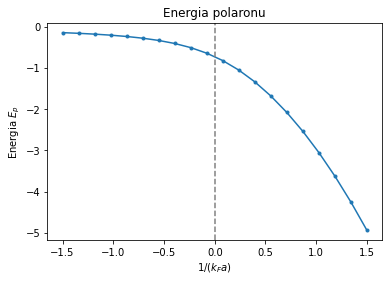

In [ ]:
# To są rezultaty:

plt.plot(ias, Es, ".", label="Energia polaronu", linestyle="-")
plt.xlabel(r"$1/(k_F a)$")
plt.ylabel(r"Energia $E_p$")
plt.title("Energia polaronu")
plt.axvline(x=0, linestyle="dashed", c="gray")
plt.show()

In [ ]:
ias[9:11],Es[9:11]

(array([ 0.07894737, -0.07894737]),
 [array([-0.82287368]), array([-0.64377115])])

# Kwantowe trajektorie

In [ ]:
# instalujemy qutip
!pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 52.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import basis, destroy, expect, mcsolve, mesolve, steadystate

Mamy $n$ fotonów we wnęce optycznej. Na skutek oddziaływania z otoczeniem, które jest w niezerowej temperaturze, fotony mogą wyciekać z wnęki i do niej wracać.

In [ ]:
# Ustalamy bazę, sprzężenie z otoczeniem, liczbę fotonów w otoczeniu 

N = 6  # liczba elementów bazy do rozważenia
kappa = 10.  # sprzężenie z otoczeniem
nthermal = 0.1*5  # tepmeratura, która prowadzi do rozkładu fotonów w otoczeni ze średnią liczbą fotonów: <n>=0.1

# Próbkujemy dynamikę w tych czasach:
ts = np.linspace(0, 1.0, 100)

In [ ]:
# ustalamy liczbę fotonów we wnęce
nphoton = 4

a = destroy(N)  # operator anihilacji fotonu we wnęce
H = a.dag() * a  # Hamiltonian fotonu we wnęce
psi0 = basis(N, nphoton)  # Stan początkowy z jakąś liczbą fotonów |nphoton>

In [ ]:
# lista operatorów kolapsu
c_ops = []

# operator kolapsu
c_ops.append(np.sqrt(kappa * (1 + nthermal)) * a)

# operator wzbudzenia
c_ops.append(np.sqrt(kappa * nthermal) * a.dag())

In [ ]:
# Liczba trajektori po których chcemy dokonać uśrednienia
trajektorie = [1, 2, 50, 100, 1024]

mc = mcsolve(H, psi0, ts, c_ops, [a.dag() * a], trajektorie)

10.1%. Run time:   2.65s. Est. time left: 00:00:00:23
20.0%. Run time:   4.34s. Est. time left: 00:00:00:17
30.1%. Run time:   5.90s. Est. time left: 00:00:00:13
40.0%. Run time:   7.25s. Est. time left: 00:00:00:10
50.0%. Run time:   8.59s. Est. time left: 00:00:00:08
60.1%. Run time:   9.96s. Est. time left: 00:00:00:06
70.0%. Run time:  11.36s. Est. time left: 00:00:00:04
80.1%. Run time:  12.76s. Est. time left: 00:00:00:03
90.0%. Run time:  14.69s. Est. time left: 00:00:00:01
100.0%. Run time:  17.00s. Est. time left: 00:00:00:00
Total run time:  17.03s


In [ ]:
# run master equation to get ensemble average expectation values
me = mesolve(H, psi0, ts, c_ops, [a.dag() * a])

# stan stacjonarny
final_state = steadystate(H, c_ops)

# średnia liczba fotonów we wnęce <n>
n_srednie = expect(a.dag() * a, final_state)

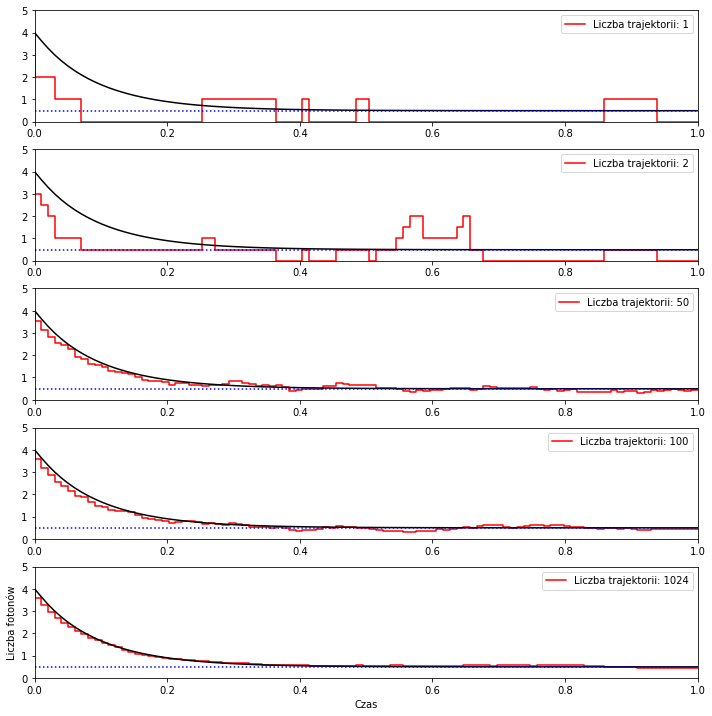

In [ ]:
plt.figure(figsize=(10,10))
ymax = nphoton*0+5


for idx, ntrajs in enumerate(trajektorie):
  plt.subplot(len(trajektorie), 1, idx+1)
  plt.step(ts, mc.expect[idx][0], "r-", label=f"Liczba trajektorii: {ntrajs}")
  plt.ylim(0, ymax)
  plt.xlim(0, ts[-1])
  plt.plot(ts, me.expect[0], "k-")
  plt.axhline(y=n_srednie, color="b", linestyle="dotted")
  plt.legend()


plt.xlabel("Czas")
plt.ylabel("Liczba fotonów")
plt.tight_layout()
plt.show()